In [1]:
import pandas as pd
import csv
import os

In [2]:
import re

def split_number(s):
    return list(filter(None, re.split(r'(\d+)', s)))

In [3]:
basic_stats = [
    'up_bytes_mean', 'up_bytes_median', 'up_bytes_std', 'up_bytes_var', 'up_bytes_skew', 'up_bytes_kurt',
    'up_bytes_perc25', 'up_bytes_perc50', 'up_bytes_perc75', 'up_bytes_perc90',
    'up_packet_mean', 'up_packet_median', 'up_packet_std', 'up_packet_var', 'up_packet_skew', 'up_packet_kurt',
    'up_packet_perc25', 'up_packet_perc50', 'up_packet_perc75', 'up_packet_perc90',
    'down_bytes_mean', 'down_bytes_median', 'down_bytes_std', 'down_bytes_var', 'down_bytes_skew', 'down_bytes_kurt',
    'down_bytes_perc25', 'down_bytes_perc50', 'down_bytes_perc75', 'down_bytes_perc90',
    'down_packet_mean', 'down_packet_median', 'down_packet_std', 'down_packet_var', 'down_packet_skew', 'down_packet_kurt',
    'down_packet_perc25', 'down_packet_perc50', 'down_packet_perc75', 'down_packet_perc90']

silences = ['down_bytes_silences', 'down_bytes_silence_mean', 'down_bytes_longest_silence', 'down_bytes_shortest_silence',
           'up_bytes_silences', 'up_bytes_silence_mean', 'up_bytes_longest_silence', 'up_bytes_shortest_silence']

scalogram = ['up_bytes_1max_y', 'up_bytes_2max_y', 'up_bytes_3max_y', 'up_bytes_4max_y', 'up_bytes_5max_y',
    'up_bytes_1max_x', 'up_bytes_2max_x', 'up_bytes_3max_x', 'up_bytes_4max_x', 'up_bytes_5max_x',
    'up_bytes_1min_y', 'up_bytes_2min_y', 'up_bytes_3min_y', 'up_bytes_4min_y', 'up_bytes_5min_y',
    'up_bytes_1min_x', 'up_bytes_2min_x', 'up_bytes_3min_x', 'up_bytes_4min_x', 'up_bytes_5min_x',
    'up_packet_1max_y', 'up_packet_2max_y', 'up_packet_3max_y', 'up_packet_4max_y', 'up_packet_5max_y',
    'up_packet_1max_x', 'up_packet_2max_x', 'up_packet_3max_x', 'up_packet_4max_x', 'up_packet_5max_x',
    'up_packet_1min_y', 'up_packet_2min_y', 'up_packet_2min_y', 'up_packet_4min_y', 'up_packet_5min_y',
    'up_packet_1min_x', 'up_packet_2min_x', 'up_packet_3min_x', 'up_packet_4min_x', 'up_packet_5min_x',
    'down_bytes_1max_y', 'down_bytes_2max_y', 'down_bytes_3max_y', 'down_bytes_4max_y', 'down_bytes_5max_y',
    'down_bytes_1max_x', 'down_bytes_2max_x', 'down_bytes_3max_x', 'down_bytes_4max_x', 'down_bytes_5max_x',
    'down_bytes_1min_y', 'down_bytes_2min_y', 'down_bytes_3min_y', 'down_bytes_4min_y', 'down_bytes_5min_y',
    'down_bytes_1min_x', 'down_bytes_2min_x', 'down_bytes_3min_x', 'down_bytes_4min_x', 'down_bytes_5min_x',
    'down_packet_1max_y', 'down_packet_2max_y', 'down_packet_3max_y', 'down_packet_4max_y', 'down_packet_5max_y',
    'down_packet_1max_x', 'down_packet_2max_x', 'down_packet_3max_x', 'down_packet_4max_x', 'down_packet_5max_x',
    'down_packet_1min_y', 'down_packet_2min_y', 'down_packet_2min_y', 'down_packet_4min_y', 'down_packet_5min_y',
    'down_packet_1min_x', 'down_packet_2min_x', 'down_packet_3min_x', 'down_packet_4min_x', 'down_packet_5min_x']

In [4]:

base_folder = "csv/30s1.00s/"

dataset = pd.DataFrame()

for path, subdirs, files in os.walk(base_folder):
    for name in files:
        data = pd.read_csv(os.path.join(str(path), str(name)))
        data['label'] = split_number(name)[0]
        dataset = pd.concat([dataset, data])
dataset = dataset.drop(columns=['Unnamed: 0']).reset_index()
dataset.drop(columns=['index', 'up_packet_silence_mean', 'down_packet_silence_mean',
                      'down_packet_longest_silence', 'down_packet_shortest_silence'], inplace=True)
features = dataset.columns
print(features)
print(len(features))

Index(['up_bytes_mean', 'up_bytes_median', 'up_bytes_std', 'up_bytes_var',
       'up_bytes_skew', 'up_bytes_kurt', 'up_bytes_perc25', 'up_bytes_perc50',
       'up_bytes_perc75', 'up_bytes_perc90',
       ...
       'down_packet_2min_y', 'down_packet_3min_y', 'down_packet_4min_y',
       'down_packet_5min_y', 'down_packet_1min_x', 'down_packet_2min_x',
       'down_packet_3min_x', 'down_packet_4min_x', 'down_packet_5min_x',
       'label'],
      dtype='object', length=133)
133


In [5]:
dataset.loc[dataset['label'] == 'netflix-ssh', 'label'] = 'netflix'
dataset.loc[dataset['label'] == 'youtube-ssh', 'label'] = 'youtube'
dataset['label'].value_counts()

youtube      402
netflix      325
acestream    164
twitch       119
Name: label, dtype: int64

In [6]:
#Test some stuff
#dataset.drop(columns=silences, inplace=True)
dataset.columns
features = dataset.columns[:-1]
features

Index(['up_bytes_mean', 'up_bytes_median', 'up_bytes_std', 'up_bytes_var',
       'up_bytes_skew', 'up_bytes_kurt', 'up_bytes_perc25', 'up_bytes_perc50',
       'up_bytes_perc75', 'up_bytes_perc90',
       ...
       'down_packet_1min_y', 'down_packet_2min_y', 'down_packet_3min_y',
       'down_packet_4min_y', 'down_packet_5min_y', 'down_packet_1min_x',
       'down_packet_2min_x', 'down_packet_3min_x', 'down_packet_4min_x',
       'down_packet_5min_x'],
      dtype='object', length=132)

In [7]:
dataset['label'] = pd.factorize(dataset['label'])[0]
labels = dataset['label']
labels

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
980     3
981     3
982     3
983     3
984     3
985     3
986     3
987     3
988     3
989     3
990     3
991     3
992     3
993     3
994     3
995     3
996     3
997     3
998     3
999     3
1000    3
1001    3
1002    3
1003    3
1004    3
1005    3
1006    3
1007    3
1008    3
1009    3
Name: label, Length: 1010, dtype: int64

In [8]:
dataset.corr()['label'].sort_values(ascending=False)

label                          1.000000
up_bytes_silence_mean          0.447270
down_bytes_silence_mean        0.442995
up_bytes_shortest_silence      0.398421
up_packet_shortest_silence     0.398421
down_bytes_shortest_silence    0.397929
up_bytes_longest_silence       0.322518
up_packet_longest_silence      0.322518
down_bytes_longest_silence     0.319683
up_bytes_median                0.280037
up_bytes_perc50                0.280037
down_bytes_perc75              0.247239
up_packet_perc75               0.216549
down_packet_perc75             0.215569
up_packet_perc50               0.190568
up_packet_median               0.190568
down_packet_median             0.149725
down_packet_perc50             0.149725
down_bytes_median              0.142299
down_bytes_perc50              0.142299
up_packet_4min_x               0.121705
up_bytes_perc75                0.114282
up_packet_4min_y               0.111927
up_packet_4max_y               0.109737
up_packet_4max_x               0.108243


In [9]:
# Imputer for NaN
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")
imputer.fit(dataset)
dataset = pd.DataFrame(imputer.transform(dataset), columns=dataset.columns)

In [10]:
'''
from sklearn.preprocessing import normalize
# Normalize data
dataset_no_label = dataset.loc[:, dataset.columns != 'label']

#dataset = (dataset_no_label - dataset_no_label.mean()) / (dataset_no_label.max() - dataset_no_label.min())
dataset_normalized = normalize(dataset_no_label)
dataset = pd.DataFrame(dataset_normalized, columns=features)
'''

"\nfrom sklearn.preprocessing import normalize\n# Normalize data\ndataset_no_label = dataset.loc[:, dataset.columns != 'label']\n\n#dataset = (dataset_no_label - dataset_no_label.mean()) / (dataset_no_label.max() - dataset_no_label.min())\ndataset_normalized = normalize(dataset_no_label)\ndataset = pd.DataFrame(dataset_normalized, columns=features)\n"

In [11]:
#PCA
'''
from sklearn.decomposition import PCA
pca = PCA(n_components=10)
main_components = pca.fit_transform(dataset)
dataset = pd.DataFrame(data = main_components)
dataset['label'] = labels
'''

"\nfrom sklearn.decomposition import PCA\npca = PCA(n_components=10)\nmain_components = pca.fit_transform(dataset)\ndataset = pd.DataFrame(data = main_components)\ndataset['label'] = labels\n"

In [12]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2, random_state=42)

y_train = train['label']
x_train = train.drop(columns=['label'])

y_test = test['label']
x_test = test.drop(columns=['label'])


In [13]:
y_train_youtube = (y_train == 0)
y_train_netflix = (y_train == 1)
y_train_twitch = (y_train == 2)


In [28]:
x_train

,up_bytes_mean,up_bytes_median,up_bytes_std,up_bytes_var,up_bytes_skew,up_bytes_kurt,up_bytes_perc25,up_bytes_perc50,up_bytes_perc75,up_bytes_perc90,...,down_packet_1min_y,down_packet_2min_y,down_packet_3min_y,down_packet_4min_y,down_packet_5min_y,down_packet_1min_x,down_packet_2min_x,down_packet_3min_x,down_packet_4min_x,down_packet_5min_x
29,-0.106607,-0.356057,0.444133,0.197255,1.559245,1.047680,-0.356057,-0.356057,0.060529,0.737694,...,0.001933,0.000970,0.001911,-1.000000,-1.000000,11.687342,7.913824,5.446436,-1.000000,-1.000000
280,-0.372025,-0.392946,0.067125,0.004506,3.391119,9.749405,-0.392946,-0.392946,-0.392946,-0.372762,...,0.005837,0.007309,0.003701,0.006417,-1.000000,12.271056,8.866947,6.441961,3.418676,-1.000000
585,-0.218664,-0.306988,0.300633,0.090380,4.592389,20.558865,-0.306988,-0.306988,-0.306988,-0.175951,...,0.004460,0.008964,0.008873,0.008419,-1.000000,12.607847,9.012173,5.565698,3.186284,-1.000000
752,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
780,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
289,0.088073,-0.388338,0.919211,0.844950,2.202457,3.552208,-0.392946,-0.388338,-0.051029,1.531375,...,0.003821,0.001755,0.007255,0.006162,-1.000000,13.309413,6.874477,4.177095,2.524395,-1.000000
165,0.184518,-0.285052,0.864407,0.747200,2.480643,5.674589,-0.299731,-0.285052,0.363255,0.765009,...,0.000254,-1.000000,-1.000000,-1.000000,-1.000000,9.934862,-1.000000,-1.000000,-1.000000,-1.000000
605,-0.284308,-0.306988,0.047967,0.002301,2.028118,2.713583,-0.306988,-0.306988,-0.306988,-0.180991,...,0.004566,0.004629,0.008275,0.008969,0.008993,12.953881,7.702424,5.272318,2.985815,2.524395
874,0.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
720,-0.238759,-0.306907,0.135741,0.018426,2.018695,3.184905,-0.306907,-0.306907,-0.284677,-0.044592,...,0.005703,0.001559,-1.000000,-1.000000,-1.000000,12.271056,7.660826,-1.000000,-1.000000,-1.000000


In [14]:
'''
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
import matplotlib.pyplot as plt

random_forest = RandomForestClassifier(random_state=42)
y_probas_forest_y = cross_val_predict(random_forest, x_train, y_train_youtube, cv=10, method="predict_proba")
y_probas_forest_n = cross_val_predict(random_forest, x_train, y_train_netflix, cv=10, method="predict_proba")
y_probas_forest_t = cross_val_predict(random_forest, x_train, y_train_twitch, cv=10, method="predict_proba")
y_probas_forest = cross_val_predict(random_forest, x_train, y_train, cv=10, method="predict_proba")
'''

'\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.model_selection import cross_val_predict, cross_val_score\nimport matplotlib.pyplot as plt\n\nrandom_forest = RandomForestClassifier(random_state=42)\ny_probas_forest_y = cross_val_predict(random_forest, x_train, y_train_youtube, cv=10, method="predict_proba")\ny_probas_forest_n = cross_val_predict(random_forest, x_train, y_train_netflix, cv=10, method="predict_proba")\ny_probas_forest_t = cross_val_predict(random_forest, x_train, y_train_twitch, cv=10, method="predict_proba")\ny_probas_forest = cross_val_predict(random_forest, x_train, y_train, cv=10, method="predict_proba")\n'

In [15]:
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
from sklearn.metrics import roc_curve

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

In [16]:
'''
y_scores_forest_y = y_probas_forest_y[:, 1]
y_scores_forest_n = y_probas_forest_n[:, 1]
y_scores_forest_t = y_probas_forest_t[:, 1]

fpr_forest_y, tpr_forest_y, thresholds_forest_y = roc_curve(y_train_youtube, y_scores_forest_y)
fpr_forest_n, tpr_forest_n, thresholds_forest_n = roc_curve(y_train_netflix, y_scores_forest_n)
fpr_forest_t, tpr_forest_t, thresholds_forest_t = roc_curve(y_train_twitch, y_scores_forest_t)
#fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_probas_forest)


plot_roc_curve(fpr_forest_y, tpr_forest_y, "YouTube")
plot_roc_curve(fpr_forest_n, tpr_forest_n, "Netflix")
plot_roc_curve(fpr_forest_t, tpr_forest_t, "Twitch")
#plot_roc_curve(fpr_forest, tpr_forest, "Multiclass")

plt.legend(loc="lower right")
plt.show()
#cvs = cross_val_score(random_forest, x_train, y_train, cv=10, scoring='accuracy')
#accuracy = sum(cvs)/len(cvs)
#print("Accuracy: " + str(accuracy))
'''

'\ny_scores_forest_y = y_probas_forest_y[:, 1]\ny_scores_forest_n = y_probas_forest_n[:, 1]\ny_scores_forest_t = y_probas_forest_t[:, 1]\n\nfpr_forest_y, tpr_forest_y, thresholds_forest_y = roc_curve(y_train_youtube, y_scores_forest_y)\nfpr_forest_n, tpr_forest_n, thresholds_forest_n = roc_curve(y_train_netflix, y_scores_forest_n)\nfpr_forest_t, tpr_forest_t, thresholds_forest_t = roc_curve(y_train_twitch, y_scores_forest_t)\n#fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train, y_probas_forest)\n\n\nplot_roc_curve(fpr_forest_y, tpr_forest_y, "YouTube")\nplot_roc_curve(fpr_forest_n, tpr_forest_n, "Netflix")\nplot_roc_curve(fpr_forest_t, tpr_forest_t, "Twitch")\n#plot_roc_curve(fpr_forest, tpr_forest, "Multiclass")\n\nplt.legend(loc="lower right")\nplt.show()\n#cvs = cross_val_score(random_forest, x_train, y_train, cv=10, scoring=\'accuracy\')\n#accuracy = sum(cvs)/len(cvs)\n#print("Accuracy: " + str(accuracy))\n'

In [17]:
'''
random_forest.fit(x_train, y_train)
predictions = random_forest.predict(x_test)
conf_mx = confusion_matrix(y_test, predictions)
plt.matshow(conf_mx, cmap=plt.cm.gray)
conf_mx
'''

'\nrandom_forest.fit(x_train, y_train)\npredictions = random_forest.predict(x_test)\nconf_mx = confusion_matrix(y_test, predictions)\nplt.matshow(conf_mx, cmap=plt.cm.gray)\nconf_mx\n'

In [18]:
#grid_search_acc = GridSearchCV(random_forest, params, cv=10, scoring='accuracy')
#grid_search_acc.fit(x_train, y_train)

In [19]:
#best = grid_search.best_estimator_

In [20]:
#best2 = grid_search_acc.best_estimator_

In [21]:
#sorted(zip(grid_search.best_estimator_.feature_importances_, basic_stats), reverse=True)

In [22]:
'''
# Final evaluation
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy', max_depth=9, max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1, oob_score=False, random_state=42, verbose=0, warm_start=False)
rf.fit(x_train, y_train)
print("Accuracy train set: " + str(sum(rf.predict(x_train) == y_train)/float(len(y_train))))
print("Accuracy test set: " + str(sum(rf.predict(x_test) == y_test)/float(len(y_test))))
'''

'\n# Final evaluation\nrf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion=\'entropy\', max_depth=9, max_features=\'log2\', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1, oob_score=False, random_state=42, verbose=0, warm_start=False)\nrf.fit(x_train, y_train)\nprint("Accuracy train set: " + str(sum(rf.predict(x_train) == y_train)/float(len(y_train))))\nprint("Accuracy test set: " + str(sum(rf.predict(x_test) == y_test)/float(len(y_test))))\n'

In [23]:
'''
crossval = cross_val_predict(rf, x_train, y_train, cv=10, method="predict_proba")
crossvalscore = cross_val_score(rf, x_train, y_train, cv=10, scoring="accuracy")
print("\tCrossValScore: " + str(sum(crossvalscore)/len(cv_yt)))
'''

'\ncrossval = cross_val_predict(rf, x_train, y_train, cv=10, method="predict_proba")\ncrossvalscore = cross_val_score(rf, x_train, y_train, cv=10, scoring="accuracy")\nprint("\tCrossValScore: " + str(sum(crossvalscore)/len(cv_yt)))\n'

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict, cross_val_score
from mlxtend.plotting import plot_decision_regions

import matplotlib.pyplot as plt

def do_test_forest(model):
    '''
    y_probas_y = cross_val_predict(model, x_train, y_train_youtube, cv=10, method="predict_proba")
    y_probas_n = cross_val_predict(model, x_train, y_train_netflix, cv=10, method="predict_proba")
    y_probas_t = cross_val_predict(model, x_train, y_train_twitch, cv=10, method="predict_proba")
    y_probas = cross_val_predict(model, x_train, y_train, cv=10, method="predict_proba")
    
    y_scores_y = y_probas_y[:, 1]
    y_scores_n = y_probas_n[:, 1]
    y_scores_t = y_probas_t[:, 1]

    fpr_y, tpr_y, thresholds_y = roc_curve(y_train_youtube, y_scores_y)
    fpr_n, tpr_n, thresholds_n = roc_curve(y_train_netflix, y_scores_n)
    fpr_t, tpr_t, thresholds_t = roc_curve(y_train_twitch, y_scores_t)

    plot_roc_curve(fpr_y, tpr_y, "YouTube")
    plot_roc_curve(fpr_n, tpr_n, "Netflix")
    plot_roc_curve(fpr_t, tpr_t, "Twitch")
    #plot_roc_curve(fpr_forest, tpr_forest, "Multiclass")

    plt.legend(loc="lower right")
    plt.show()
    #cvs = cross_val_score(random_forest, x_train, y_train, cv=10, scoring='accuracy')
    #accuracy = sum(cvs)/len(cvs)
    #print("Accuracy: " + str(accuracy))
    '''
    cv_yt = cross_val_score(model, x_train, y_train_youtube, cv=10, scoring="accuracy")
    cv_nf = cross_val_score(model, x_train, y_train_netflix, cv=10, scoring="accuracy")
    cv_tw = cross_val_score(model, x_train, y_train_twitch, cv=10, scoring="accuracy")
    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    '''
    print("YouTube: ")
    print("\tCrossValScore: " + str(sum(cv_yt)/len(cv_yt)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_youtube, y_scores_y)))
    print("Netflix: ")
    print("\tCrossValScore: " + str(sum(cv_nf)/len(cv_nf)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_netflix, y_scores_n)))
    print("Twitch: ")
    print("\tCrossValScore: " + str(sum(cv_tw)/len(cv_tw)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_twitch, y_scores_t)))
    print("Multiclass: ")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))
    '''
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    print(conf_mx)
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

In [25]:
from sklearn.decomposition import PCA

def do_test_svm(model):    
    '''
    y_probas_y = cross_val_predict(model, x_train, y_train_youtube, cv=10, method="predict_proba")
    y_probas_n = cross_val_predict(model, x_train, y_train_netflix, cv=10, method="predict_proba")
    y_probas_t = cross_val_predict(model, x_train, y_train_twitch, cv=10, method="predict_proba")
    y_probas = cross_val_predict(model, x_train, y_train, cv=10, method="predict_proba")
    y_scores_y = y_probas_y[:, 1]
    y_scores_n = y_probas_n[:, 1]
    y_scores_t = y_probas_t[:, 1]
    

    fpr_y, tpr_y, thresholds_y = roc_curve(y_train_youtube, y_scores_y)
    fpr_n, tpr_n, thresholds_n = roc_curve(y_train_netflix, y_scores_n)
    fpr_t, tpr_t, thresholds_t = roc_curve(y_train_twitch, y_scores_t)
    plot_roc_curve(fpr_y, tpr_y, "YouTube")
    plot_roc_curve(fpr_n, tpr_n, "Netflix")
    plot_roc_curve(fpr_t, tpr_t, "Twitch")
    #plot_roc_curve(fpr_forest, tpr_forest, "Multiclass")

    plt.legend(loc="lower right")
    plt.show()
    #cvs = cross_val_score(random_forest, x_train, y_train, cv=10, scoring='accuracy')
    #accuracy = sum(cvs)/len(cvs)
    #print("Accuracy: " + str(accuracy))
    '''
    cv_yt = cross_val_score(model, x_train, y_train_youtube, cv=10, scoring="accuracy")
    cv_nf = cross_val_score(model, x_train, y_train_netflix, cv=10, scoring="accuracy")
    cv_tw = cross_val_score(model, x_train, y_train_twitch, cv=10, scoring="accuracy")
    
    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    '''
    print("YouTube: ")
    print("\tCrossValScore: " + str(sum(cv_yt)/len(cv_yt)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_youtube, y_scores_y)))
    print("Netflix: ")
    print("\tCrossValScore: " + str(sum(cv_nf)/len(cv_nf)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_netflix, y_scores_n)))
    print("Twitch: ")
    print("\tCrossValScore: " + str(sum(cv_tw)/len(cv_tw)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_twitch, y_scores_t)))
    '''
    print("Multiclass: ")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))

    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    print(conf_mx)
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

In [26]:
def do_test_knn(model):
    
    y_probas_y = cross_val_predict(model, x_train, y_train_youtube, cv=10, method="predict_proba")
    y_probas_n = cross_val_predict(model, x_train, y_train_netflix, cv=10, method="predict_proba")
    y_probas_t = cross_val_predict(model, x_train, y_train_twitch, cv=10, method="predict_proba")
    y_probas = cross_val_predict(model, x_train, y_train, cv=10, method="predict_proba")
    y_scores_y = y_probas_y[:, 1]
    y_scores_n = y_probas_n[:, 1]
    y_scores_t = y_probas_t[:, 1]
    

    fpr_y, tpr_y, thresholds_y = roc_curve(y_train_youtube, y_scores_y)
    fpr_n, tpr_n, thresholds_n = roc_curve(y_train_netflix, y_scores_n)
    fpr_t, tpr_t, thresholds_t = roc_curve(y_train_twitch, y_scores_t)
    plot_roc_curve(fpr_y, tpr_y, "YouTube")
    plot_roc_curve(fpr_n, tpr_n, "Netflix")
    plot_roc_curve(fpr_t, tpr_t, "Twitch")
    #plot_roc_curve(fpr_forest, tpr_forest, "Multiclass")

    plt.legend(loc="lower right")
    plt.show()
    #cvs = cross_val_score(random_forest, x_train, y_train, cv=10, scoring='accuracy')
    #accuracy = sum(cvs)/len(cvs)
    #print("Accuracy: " + str(accuracy))
    
    cv_yt = cross_val_score(model, x_train, y_train_youtube, cv=10, scoring="accuracy")
    cv_nf = cross_val_score(model, x_train, y_train_netflix, cv=10, scoring="accuracy")
    cv_tw = cross_val_score(model, x_train, y_train_twitch, cv=10, scoring="accuracy")
    
    cv_mc = cross_val_score(model, x_train, y_train, cv=10, scoring="accuracy")
    
    print("YouTube: ")
    print("\tCrossValScore: " + str(sum(cv_yt)/len(cv_yt)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_youtube, y_scores_y)))
    print("Netflix: ")
    print("\tCrossValScore: " + str(sum(cv_nf)/len(cv_nf)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_netflix, y_scores_n)))
    print("Twitch: ")
    print("\tCrossValScore: " + str(sum(cv_tw)/len(cv_tw)) + "\n\tRocAucScore:  " + str(roc_auc_score(y_train_twitch, y_scores_t)))
    
    print("Multiclass: ")
    print("\tCrossValScore: " + str(sum(cv_mc)/len(cv_mc)))

    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    conf_mx = confusion_matrix(y_test, predictions)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
    print(conf_mx)
    print("\nAccuracy train set: " + str(sum(model.predict(x_train) == y_train)/float(len(y_train))))
    print("Accuracy test set: " + str(sum(predictions == y_test)/float(len(y_test))))

-----Random Forest------
[[58  0  0  0]
 [ 0 89  0  0]
 [ 0  0 30  0]
 [ 1  1  0 23]]

Accuracy train set: 1.0
Accuracy test set: 0.9900990099009901
-----OvO Classifier Random Forest------
[[57  1  0  0]
 [ 0 89  0  0]
 [ 0  0 30  0]
 [ 2  0  0 23]]

Accuracy train set: 1.0
Accuracy test set: 0.9851485148514851
----------SVM-----------
Multiclass: 
	CrossValScore: 0.9294760626327475
[[53  5  0  0]
 [ 1 87  0  1]
 [ 0  0 30  0]
 [ 0  3  0 22]]

Accuracy train set: 0.995049504950495
Accuracy test set: 0.9504950495049505
----------Knn-----------


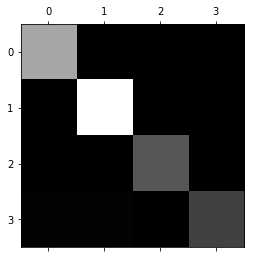

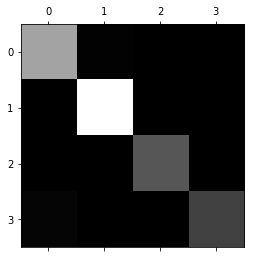

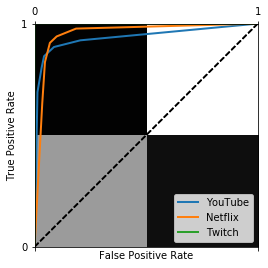

YouTube: 
	CrossValScore: 0.9232238030713639
	RocAucScore:  0.9389914639971755
Netflix: 
	CrossValScore: 0.9244531014754592
	RocAucScore:  0.9558427727756802
Twitch: 
	CrossValScore: 0.99875
	RocAucScore:  0.9992581602373888
Multiclass: 
	CrossValScore: 0.9156932592983852
[[54  4  0  0]
 [ 3 84  0  2]
 [ 0  0 30  0]
 [ 0  1  0 24]]

Accuracy train set: 0.943069306930693
Accuracy test set: 0.9504950495049505
-----Neural Network-----


/home/agro/work/thesis/env/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


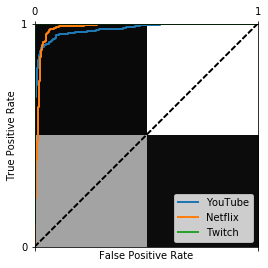

YouTube: 
	CrossValScore: 0.9293198584763624
	RocAucScore:  0.9739766142599016
Netflix: 
	CrossValScore: 0.9379738783498948
	RocAucScore:  0.9787975602672088
Twitch: 
	CrossValScore: 0.99875
	RocAucScore:  1.0
Multiclass: 
	CrossValScore: 0.9403962624192355
[[48 10  0  0]
 [ 0 86  0  3]
 [ 0  0 30  0]
 [ 1  1  0 23]]

Accuracy train set: 0.8997524752475248
Accuracy test set: 0.9257425742574258
--------AdaBoost Random Forest--------
[[57  1  0  0]
 [ 0 89  0  0]
 [ 0  0 30  0]
 [ 1  1  0 23]]

Accuracy train set: 1.0
Accuracy test set: 0.9851485148514851
---------Decision Tree------
[[54  4  0  0]
 [ 1 87  0  1]
 [ 0  0 30  0]
 [ 2  1  0 22]]

Accuracy train set: 1.0
Accuracy test set: 0.9554455445544554
--------AdaBoost Decision Tree--------
[[52  6  0  0]
 [ 3 85  0  1]
 [ 0  0 30  0]
 [ 1  2  0 22]]

Accuracy train set: 1.0
Accuracy test set: 0.9356435643564357


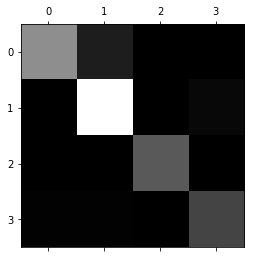

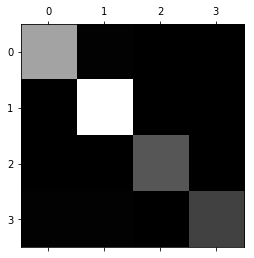

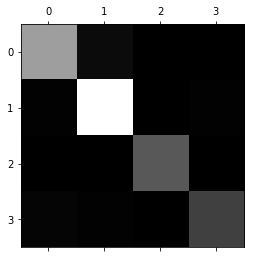

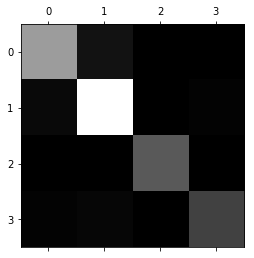

In [27]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.tree import DecisionTreeClassifier


print("-----Random Forest------")
rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy', max_depth=9,
                            max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0,
                            min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1, oob_score=False,
                            random_state=42, verbose=0, warm_start=False)


do_test_forest(rf)


print("-----OvO Classifier Random Forest------")

rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy', max_depth=9,
                            max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0,
                            min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1, oob_score=False,
                            random_state=42, verbose=0, warm_start=False)
rf = OneVsOneClassifier(rf)
do_test_forest(rf)

print("----------SVM-----------")
svm = SVC(random_state=42, probability=True)
do_test_svm(svm)

print("----------Knn-----------")
knn = KNeighborsClassifier()
do_test_knn(knn)

print("-----Neural Network-----")
nn = MLPClassifier()
do_test_knn(nn)


print("--------AdaBoost Random Forest--------")

rf = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy', max_depth=9,
                            max_features='log2', max_leaf_nodes=None, min_impurity_decrease=0.0,
                            min_impurity_split=None, min_samples_leaf=1, min_samples_split=2,
                            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1, oob_score=False,
                            random_state=42, verbose=0, warm_start=False)

ada_clf = AdaBoostClassifier(
    rf,
    algorithm="SAMME.R", learning_rate=0.5
)
do_test_forest(ada_clf)

print("---------Decision Tree------")
dt = DecisionTreeClassifier(random_state=42)

do_test_forest(dt)

print("--------AdaBoost Decision Tree--------")

dt = DecisionTreeClassifier(random_state=42)

ada_clf = AdaBoostClassifier(
    dt,
    algorithm="SAMME.R", learning_rate=0.5
)
do_test_forest(ada_clf)



